# 平均売上

## 事前準備

ここから平均賃金をダウンロード：https://data.oecd.org/earnwage/average-wages.htm

ここから一時間あたりの賃金の伸びをダウンロード：https://data.oecd.org/lprdty/labour-compensation-per-hour-worked.htm

In [1]:
!pip install japanize_matplotlib
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 5.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730985 sha256=fa7d391eaadc6f0519056c7c80c7a9d349c45916d595dd919cfc235deb70d2c4
  Stored in directory: /home/jovyan/.cache/pip/wheels/33/3d/82/4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
Successfully built pymeeus


In [2]:
import pandas as pd

In [4]:
average_wage_df = pd.read_csv('../data/average_wages.csv')
wage_per_hour_df = pd.read_csv('../data/labour_compensation_per_hour_worked.csv')

In [5]:
average_wage_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,AVWAGE,TOT,USD,A,1990,39875.345702,NaN
1,AUS,AVWAGE,TOT,USD,A,1991,39685.259630,NaN
2,AUS,AVWAGE,TOT,USD,A,1992,40481.994276,NaN
3,AUS,AVWAGE,TOT,USD,A,1993,40854.703847,NaN
4,AUS,AVWAGE,TOT,USD,A,1994,41131.575639,NaN


In [6]:
wage_per_hour_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,LABCOMP,TOT,AGRWTH,A,1986,5.168118,NaN
1,AUS,LABCOMP,TOT,AGRWTH,A,1987,5.915590,NaN
2,AUS,LABCOMP,TOT,AGRWTH,A,1988,7.255069,NaN
3,AUS,LABCOMP,TOT,AGRWTH,A,1989,5.978699,NaN
4,AUS,LABCOMP,TOT,AGRWTH,A,1990,6.079851,NaN


In [7]:
for column in average_wage_df.columns:
    print(column, average_wage_df[column].unique())

LOCATION ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'IRL'
 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NOR' 'POL' 'PRT' 'SVK' 'ESP' 'SWE'
 'CHE' 'GBR' 'USA' 'EST' 'ISR' 'SVN' 'OECD' 'ISL' 'NZL' 'CHL' 'LVA' 'LTU']
INDICATOR ['AVWAGE']
SUBJECT ['TOT']
MEASURE ['USD']
FREQUENCY ['A']
TIME [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]
Value [39875.34570239 39685.25962995 40481.99427624 ... 27572.38345028
 29695.40261173 31810.980085  ]
Flag Codes [nan]


In [8]:
for column in wage_per_hour_df.columns:
    print(column, wage_per_hour_df[column].unique())

LOCATION ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'IRL'
 'ITA' 'JPN' 'KOR' 'LUX' 'NLD' 'NOR' 'POL' 'PRT' 'SVK' 'ESP' 'SWE' 'GBR'
 'USA' 'EST' 'ISR' 'SVN' 'EU28' 'MEX' 'NZL' 'LTU' 'EA19' 'ZAF' 'LVA' 'RUS'
 'CHE' 'BGR' 'HRV' 'PER' 'ISL' 'ROU' 'CRI' 'CHL' 'COL' 'EU27_2020']
INDICATOR ['LABCOMP']
SUBJECT ['TOT']
MEASURE ['AGRWTH' 'IDX2015']
FREQUENCY ['A']
TIME [1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1970]
Value [  5.168118   5.91559    7.255069 ... 108.900922 113.625171 114.578468]
Flag Codes [nan]


In [9]:
target_countries_dic = {
    'JPN': '日本',
    'USA': 'アメリカ',
    'KOR': '韓国',
    'AUS': 'オーストラリア',
    'DEU': 'ドイツ'
}

In [10]:
target_average_wage_df = average_wage_df[average_wage_df['LOCATION'].isin(target_countries_dic.keys())].copy()
target_average_wage_df['J_LOCATION'] = target_average_wage_df['LOCATION'].map(target_countries_dic)
target_wage_per_hour_df = wage_per_hour_df[wage_per_hour_df['LOCATION'].isin(target_countries_dic.keys())].copy()
target_wage_per_hour_df['J_LOCATION'] = target_wage_per_hour_df['LOCATION'].map(target_countries_dic)


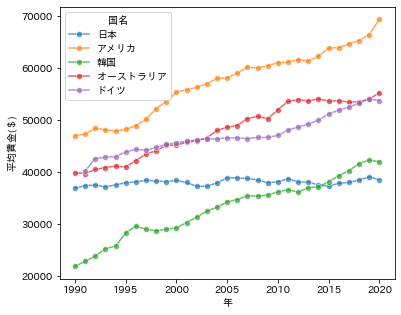

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
import japanize_matplotlib

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1) 

sns.lineplot(x='TIME', y='Value', data=target_average_wage_df, hue='J_LOCATION', hue_order=target_countries_dic.values(), ax=ax, marker='o', alpha=0.7)
ax.set(ylabel='平均賃金(＄)', xlabel='年')
plt.legend(labels=target_countries_dic.values(), title = "国名")


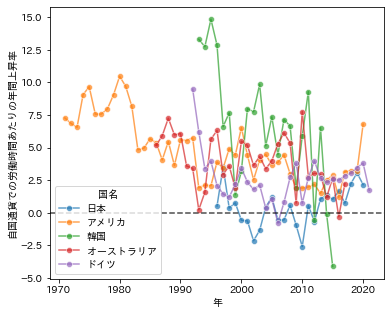

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
import japanize_matplotlib

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1) 

sns.lineplot(x='TIME', y='Value', data=target_wage_per_hour_df[target_wage_per_hour_df['MEASURE']=='AGRWTH'], 
             hue='J_LOCATION', hue_order=target_countries_dic.values(), ax=ax, marker='o', alpha=0.7)
ax.axhline(0., color='k', ls="--", alpha=0.7)

ax.set(ylabel='自国通貨での労働時間あたりの年間上昇率', xlabel='年')
plt.legend(labels=target_countries_dic.values(), title = "国名")


In [13]:
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

In [14]:
# prpphetモデルで予測する

In [15]:
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [16]:
prpphet_df = target_average_wage_df[['TIME','J_LOCATION', 'Value']].copy()
prpphet_df.head()

,TIME,J_LOCATION,Value
0,1990,オーストラリア,39875.345702
1,1991,オーストラリア,39685.259630
2,1992,オーストラリア,40481.994276
3,1993,オーストラリア,40854.703847
4,1994,オーストラリア,41131.575639


In [17]:
prpphet_df = prpphet_df.rename(columns={'TIME': 'ds', 'Value':'y'})
prpphet_df['ds'] = pd.to_datetime(prpphet_df['ds'], format='%Y')

In [18]:
prpphet_df['J_LOCATION']

0      オーストラリア
1      オーストラリア
2      オーストラリア
3      オーストラリア
4      オーストラリア
        ...   
802       アメリカ
803       アメリカ
804       アメリカ
805       アメリカ
806       アメリカ
Name: J_LOCATION, Length: 154, dtype: object

12:13:21 - cmdstanpy - INFO - Chain [1] start processing
12:13:22 - cmdstanpy - INFO - Chain [1] done processing
12:13:24 - cmdstanpy - INFO - Chain [1] start processing
12:13:26 - cmdstanpy - INFO - Chain [1] done processing
12:13:28 - cmdstanpy - INFO - Chain [1] start processing
12:13:29 - cmdstanpy - INFO - Chain [1] done processing
12:13:33 - cmdstanpy - INFO - Chain [1] start processing
12:13:34 - cmdstanpy - INFO - Chain [1] done processing
12:13:37 - cmdstanpy - INFO - Chain [1] start processing
12:13:39 - cmdstanpy - INFO - Chain [1] done processing


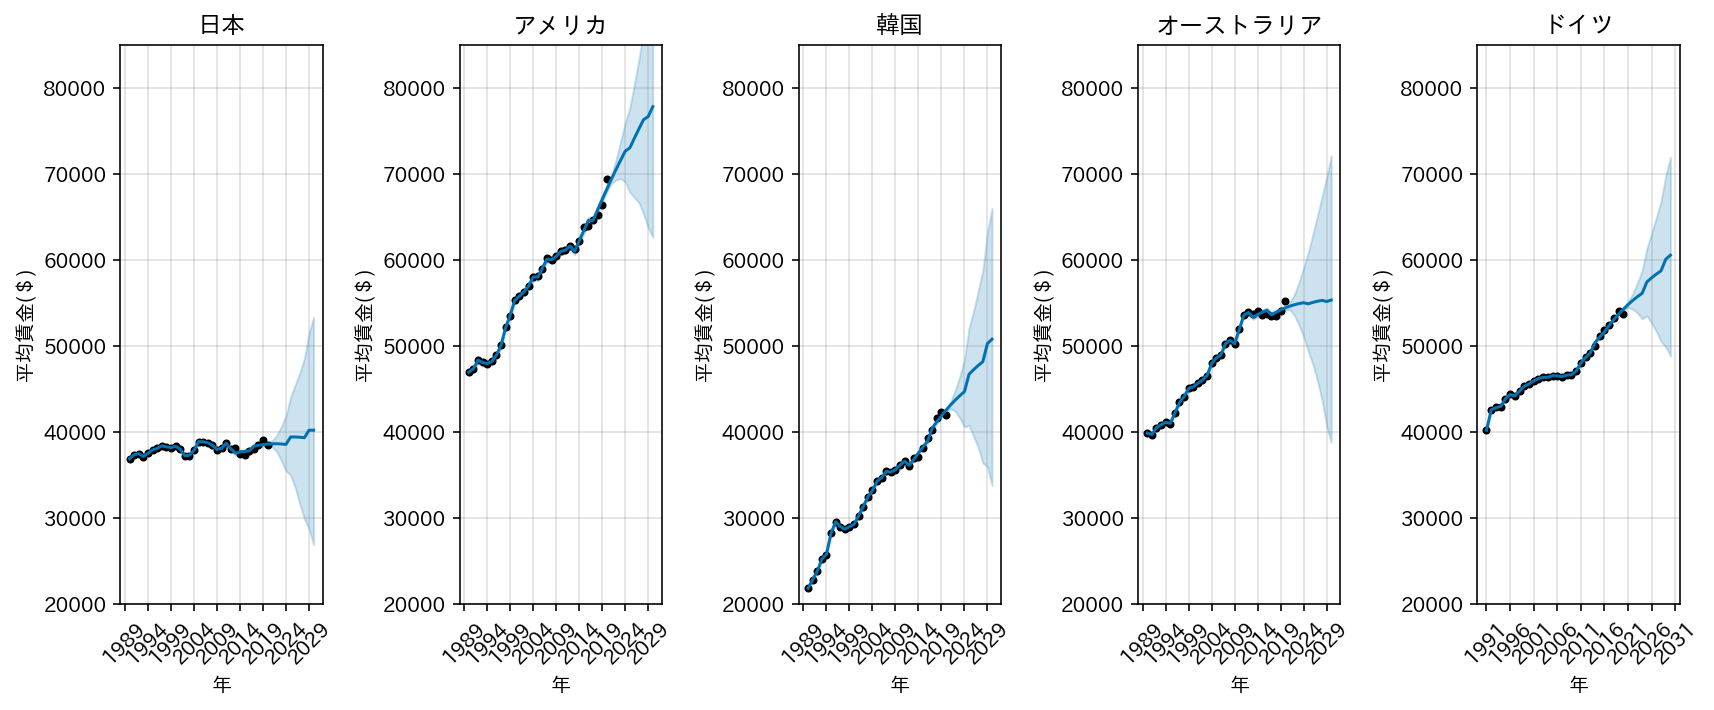

In [19]:
%config InlineBackend.figure_formats = {'png', 'retina'}

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 5))

for i, comp_name in enumerate(target_countries_dic.values()):
    m = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, weekly_seasonality=False).fit(prpphet_df[prpphet_df['J_LOCATION']==comp_name])
    future = m.make_future_dataframe(periods=10, freq='Y')
    fcst = m.predict(future)
    m.plot(fcst, ax=axs[i])  # Now it plots on the axes that we created
    axs[i].set_title(comp_name)
    axs[i].set_ylim([20000, 85000])
    axs[i].set_xlabel('年')
    axs[i].set_ylabel('平均賃金(＄)')
    axs[i].tick_params(axis='x', labelrotation = 45)